# 05: How to structure you NetCDF file or files

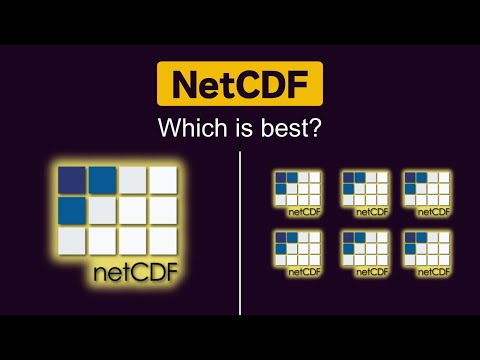

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('1D6yc-R9abU')

If you have lots of dimensions, deciding how to structure your CF-NetCDF file can be tricky. In this notebook we will look at some best practices for structuring your data. The notebook is divided into different sections for different types of data you might have.

There are many examples in the CF conventions of how to structure your data.  
https://cfconventions.org/Data/cf-conventions/cf-conventions-1.10/cf-conventions.html

There are far too many to go through all the examples. We will just look at a few. But the aim is that this tutorial will teach you what you should be thinking about when deciding to structure your data, so you can tackle any setup you have.

## What to consider

Whenever we are creating one or many CF-NetCDF files, we should try to make sure they are 
1) compliant with the CF conventions and ACDD conventions as a minimum
2) structured in a way that is consistent with the commonly accepted best practices

But what makes a certain method a *best practice*?
* Data should be stored efficiently inside file(s), limiting the file size and amount of empty space.
* Metadata should describe the data to an appropriate level of *granularity*. Finer granulairty means there are more files each with there own metadata to describe the data they contain, so the data are described at a higher resolution.
* The data and metadata should be easy to read, write, understand and use.

## An appropriate level of granularity for your data

How many files CF-NetCDF files should you divide your data into?

There are many things to consider here. Quite often the granularity of data is not fine enough, as data creators encode their discovery level metadata (global attributes) considering only what is useful for human interpretation and not for machine action. Finer granularity data is easier to build services upon, such as on-the-fly visualisation of datasets, or aggregates datasets together. Finer granularity data allows computers do the data preparation so that humans can focus on interpretation and analysis.

The data creator should also consider what granularity is useful for the data users. This will vary on a case-by-case basis. Perhaps you have a long time series of data, spanning many years. Many data users might not be interested in the entire time series, but might want to access data for a single day or month. Therefore, you might consider dividing your data into daily or monthly files to simplify data use. You could also separate different data variables into different files if you envisage that each file might attract different data users.

Data from different stations should also be divided into different datasets. Imagine we have set up 6 weather stations and want to publish the fictitious data.

<img src="../data/media/weather_stations_one_project.png" alt="Weather stations plotted by one project" width="500">

We have 2 options for how to struture our data.
1. Include all 6 time series in one NetCDF file
2. Create a separate time series for each profile.

The best practice is to create a separate file for each time series. This might suprise some of you, and the idea of creating dozens or maybe hundreds of files might sound daunting or even ridiculous.

Firstly, you shouldn't think of your data in isolation. **Your data are a contribution to a much larger network of data**. Imagine that each marker below is a weather station, and the colour is the person or project who is responsible for the data. Imagine you are a looking for data inside the red square. For many data users, the project that the data were collected as part of is irrelevant. Many users want to access data from all the projects and combine them.

<img src="../data/media/weather_stations_all.png" alt="Weather stations plotted by many institutions" width="500">

Sure, it is easier for you and the people in your project to group the data by project. But you already have the data and can group them how you like between yourselves. When it comes to publishing data, we need to think about the data users outside of the project. Data, if published correctly, could be used for decades in to the future, perhaps longer in some cases. The majority of your data users might have never heard of your project!

Creating individual files for each time series has another advantage; each file can have its own set of global attributes! This has many advantages, including:
* If one time series was processed differently, this can be described.
* Each file has its own bounding coordinates. Imagine you go to a data centre or data access portal and you are looking for data on a map. A file with many time series will show up as a box on a map. Without opening the file up, it is difficult to see which locations have been sampled. What if a potential data user is only interested in a certain location within the bounding box? A file that contains a single time series would show up as a point on a map.
* Each time series can be published separately and have its own citation - including different authors if that is desired. If someone uses only one or a few of the files, they can only cite the relevant ones. It is then clear which data they have used in their work. Many good data centres are now able to provide you with a 'parent' page for your entire data collection with its own DOI and recommended citation that one can cite if they are using most or all of the files.

Some might see it as a hassle to download and open lots of files. Some services are already being developed to allow data to download data from many similar files into a single file. More services will surely be available in the future. When we are publishing data, we should think not only about what is possible now, but what will be possible in the future. 

But for now, in the next few tutorials, we will look at how you can create and access multiple files quickly and easily today using Python!

Need some convincing? Let's look at another example for vertical profiles (e.g. CTD data).

## Multiple profiles

Let's import the modules we will use for this tutorial.

In [2]:
import xarray as xr
import numpy as np

Imagine we have the following 4 depth profiles:

In [3]:
depth = [10,20,30]
temperature_1 = [21.42, 21.21, 20.98]
temperature_2 = [22.08, 21.56, 20.42]
temperature_3 = [22.11, 21.38, 20.12]
temperature_4 = [21.87, 21.01, 19.99]

Many people publish all the data from a single cruise in one file. But we have just learned that this is not the best practice! 

If we wanted to publish all the profiles in one file, we need another dimension to distinguish between the profiles. Time is a sensible choice.

In [4]:
time = [0,1,2,3]

But now we need to made a 2D array of our temperature values.

In [5]:
temperature_2d = [temperature_1, temperature_2, temperature_3, temperature_4]
temperature_2d

[[21.42, 21.21, 20.98],
 [22.08, 21.56, 20.42],
 [22.11, 21.38, 20.12],
 [21.87, 21.01, 19.99]]

We can fit the data into our xarray object like this:

In [6]:
xrds = xr.Dataset(
    coords = {
        'depth': depth,
        'time': time
    },
    data_vars = {
        'sea_water_temperature': (['time','depth'],temperature_2d)
    }
)

xrds

<xarray.Dataset>
Dimensions:                (time: 4, depth: 3)
Coordinates:
  * depth                  (depth) int64 10 20 30
  * time                   (time) int64 0 1 2 3
Data variables:
    sea_water_temperature  (time, depth) float64 21.42 21.21 ... 21.01 19.99

But don't forget that we now also need to include the latitude and longitude as variables. Latitude and longitude aren't required variables if your NetCDF file contains a single vertical profile - they can be written as global attributes instead. 

But in this case, latitude and longitude can be 1D variables with a dimension of time.

In [7]:
latitude = [78.5142,79.2833,79.9840,80.4228]
longitude = [30.4231,30.3591,30.4994, 30.4200]

xrds = xr.Dataset(
    coords = {
        'depth': depth,
        'time': time
    },
    data_vars = {
        'sea_water_temperature': (['time','depth'],temperature_2d),
        'latitude': ('time', latitude),
        'longitude': ('time', longitude)
    }
)

xrds

<xarray.Dataset>
Dimensions:                (time: 4, depth: 3)
Coordinates:
  * depth                  (depth) int64 10 20 30
  * time                   (time) int64 0 1 2 3
Data variables:
    sea_water_temperature  (time, depth) float64 21.42 21.21 ... 21.01 19.99
    latitude               (time) float64 78.51 79.28 79.98 80.42
    longitude              (time) float64 30.42 30.36 30.5 30.42

This NetCDF file has more variables and dimensions than one that includes only a single profile. This leaves more room for variation in how people might structure their data. Sometimes you see people including latitude and longitude as coordinate variables with themselves as their dimensions, like below. 

In [8]:
latitude = [78.5142,79.2833,79.9840,80.4228]
longitude = [30.4231,30.3591,30.4994, 30.4200]

xrds = xr.Dataset(
    coords = {
        'depth': depth,
        'time': time
    },
    data_vars = {
        'sea_water_temperature': (['time','depth'],temperature_2d),
        'latitude': ('latitude', latitude),
        'longitude': ('longitude', longitude)
    }
)

xrds

<xarray.Dataset>
Dimensions:                (time: 4, depth: 3, latitude: 4, longitude: 4)
Coordinates:
  * latitude               (latitude) float64 78.51 79.28 79.98 80.42
  * longitude              (longitude) float64 30.42 30.36 30.5 30.42
  * depth                  (depth) int64 10 20 30
  * time                   (time) int64 0 1 2 3
Data variables:
    sea_water_temperature  (time, depth) float64 21.42 21.21 ... 21.01 19.99

If we are being pedantic, we could say that latitude and longitude are not explicitely linked to time in this case. One has to make the assumption that they are linked. 

It is also easier to make mistakes when creating the files in this case - for example by accidentally encoding latitude with the wrong length.     

In [9]:
latitude = [78.5142,79.2833,79.9840]
longitude = [30.4231,30.3591,30.4994, 30.4200]

xrds = xr.Dataset(
    coords = {
        'depth': depth,
        'time': time
    },
    data_vars = {
        'sea_water_temperature': (['time','depth'],temperature_2d),
        'latitude': ('latitude', latitude),
        'longitude': ('longitude', longitude)
    }
)

xrds

<xarray.Dataset>
Dimensions:                (time: 4, depth: 3, latitude: 3, longitude: 4)
Coordinates:
  * latitude               (latitude) float64 78.51 79.28 79.98
  * longitude              (longitude) float64 30.42 30.36 30.5 30.42
  * depth                  (depth) int64 10 20 30
  * time                   (time) int64 0 1 2 3
Data variables:
    sea_water_temperature  (time, depth) float64 21.42 21.21 ... 21.01 19.99

No error! It would be easy to overlook that we have only 3 latitude values and 4 longitude values.

If you make assign a dimension of time to your latitude and longitude variables, an error is returned if, for example, your latitude variable is the wrong length.

In [10]:
latitude = [78.5142,79.2833,79.9840]
longitude = [30.4231,30.3591,30.4994, 30.4200]

try:
    xrds = xr.Dataset(
        coords = {
            'depth': depth,
            'time': time
        },
        data_vars = {
            'sea_water_temperature': (['time','depth'],temperature_2d),
            'latitude': ('time', latitude),
            'longitude': ('time', longitude)
        }
    )
except Exception as e:
    # Handle the exception by printing an error message
    print("An error occurred:", e)

An error occurred: conflicting sizes for dimension 'time': length 3 on 'latitude' and length 4 on {'time': 'sea_water_temperature', 'depth': 'sea_water_temperature'}


Okay, that is all well and good. These issues might seem small. However, often our profiles are different lengths, like this.

In [11]:
depth_1 = [10,20,30]
temperature_1 = [21.42, 21.21, 20.98]
depth_2 = [10,20,30,40,50]
temperature_2 = [22.08, 21.56, 20.42, 19.23, 18.53]
depth_3 = [10,20,30,40,50,60]
temperature_3 = [22.42, 21.21, 20.12, 19.45, 18.72, 16.99]
depth_4 = [10,20]
temperature_4 = [21.84, 21.49]

But a 2D array needs to have profiles of equal lengths. To address this, we need to fill the rest of our 2D array with NaNs.

In [12]:
# Finding the maximum length among the depth arrays
max_depth_length = max(len(depth_1), len(depth_2), len(depth_3), len(depth_4))

# Creating arrays filled with NaNs
temp_arr_1 = np.full(max_depth_length, np.nan)
temp_arr_2 = np.full(max_depth_length, np.nan)
temp_arr_3 = np.full(max_depth_length, np.nan)
temp_arr_4 = np.full(max_depth_length, np.nan)

# Filling the arrays with available temperature data
temp_arr_1[:len(temperature_1)] = temperature_1
temp_arr_2[:len(temperature_2)] = temperature_2
temp_arr_3[:len(temperature_3)] = temperature_3
temp_arr_4[:len(temperature_4)] = temperature_4

# Creating a 2D array
temperature_2d = np.array([temp_arr_1, temp_arr_2, temp_arr_3, temp_arr_4])
temperature_2d

array([[21.42, 21.21, 20.98,   nan,   nan,   nan],
       [22.08, 21.56, 20.42, 19.23, 18.53,   nan],
       [22.42, 21.21, 20.12, 19.45, 18.72, 16.99],
       [21.84, 21.49,   nan,   nan,   nan,   nan]])

In [13]:
latitude = [78.5142,79.2833,79.9840,80.4228]
longitude = [30.4231,30.3591,30.4994, 30.4200]

xrds = xr.Dataset(
    coords = {
        'depth': depth_3, # The longest profile
        'time': time
    },
    data_vars = {
        'sea_water_temperature': (['time','depth'],temperature_2d),
        'latitude': ('time', latitude),
        'longitude': ('time', longitude)
    }
)

xrds

<xarray.Dataset>
Dimensions:                (time: 4, depth: 6)
Coordinates:
  * depth                  (depth) int64 10 20 30 40 50 60
  * time                   (time) int64 0 1 2 3
Data variables:
    sea_water_temperature  (time, depth) float64 21.42 21.21 20.98 ... nan nan
    latitude               (time) float64 78.51 79.28 79.98 80.42
    longitude              (time) float64 30.42 30.36 30.5 30.42

So all the profiles need to be extended to the maximum depth in this case. You can imagine that this could create a lot of empty space in your files!

But there is more... 

In the example above each profile is sampled at 10 m increments. What if different depths are sampled for each profile? Well, the depth coordinate variable would have to encompass all the depths sampled across all profiles. For example:

In [14]:
depth_1 = [5,20,50]
temperature_1 = [21.42, 21.21, 20.98]
depth_2 = [10,35,70,90,100]
temperature_2 = [22.08, 21.56, 20.42, 19.23, 18.53]
depth_3 = [10,25,40,60,80,100]
temperature_3 = [22.42, 21.21, 20.12, 19.45, 18.72, 16.99]
depth_4 = [12,24]
temperature_4 = [21.84, 21.49]

# Merge all unique depth values
all_depths = sorted(set(depth_1 + depth_2 + depth_3 + depth_4))

# Create arrays filled with NaNs for temperatures
all_temperatures = []
for depths, temps in [(depth_1, temperature_1), (depth_2, temperature_2),
                      (depth_3, temperature_3), (depth_4, temperature_4)]:
    temp_arr = np.full(len(all_depths), np.nan)
    # Adding temperature values to each array
    for depth, temp in zip(depths, temps):
        index = all_depths.index(depth)
        temp_arr[index] = temp
    all_temperatures.append(temp_arr)

# Create a 2D array
temperature_2d = np.array(all_temperatures)
temperature_2d

array([[21.42,   nan,   nan, 21.21,   nan,   nan,   nan,   nan, 20.98,
          nan,   nan,   nan,   nan,   nan],
       [  nan, 22.08,   nan,   nan,   nan,   nan, 21.56,   nan,   nan,
          nan, 20.42,   nan, 19.23, 18.53],
       [  nan, 22.42,   nan,   nan,   nan, 21.21,   nan, 20.12,   nan,
        19.45,   nan, 18.72,   nan, 16.99],
       [  nan,   nan, 21.84,   nan, 21.49,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan]])

In [15]:
latitude = [78.5142,79.2833,79.9840,80.4228]
longitude = [30.4231,30.3591,30.4994, 30.4200]

xrds = xr.Dataset(
    coords = {
        'depth': all_depths,
        'time': time
    },
    data_vars = {
        'sea_water_temperature': (['time','depth'],temperature_2d),
        'latitude': ('time', latitude),
        'longitude': ('time', longitude)
    }
)

xrds

<xarray.Dataset>
Dimensions:                (time: 4, depth: 14)
Coordinates:
  * depth                  (depth) int64 5 10 12 20 24 25 ... 50 60 70 80 90 100
  * time                   (time) int64 0 1 2 3
Data variables:
    sea_water_temperature  (time, depth) float64 21.42 nan nan ... nan nan nan
    latitude               (time) float64 78.51 79.28 79.98 80.42
    longitude              (time) float64 30.42 30.36 30.5 30.42

That is a lot of empty space! Only 16 out of 56 points contain values! This gets worse the more profiles you have!

All of this makes it more difficult to build useful services on top of your data. This could be 
* on-the-fly visualisation of data on a data centre or data access portal website
* aggregating data from several files together
* allowing users to access only a subset of the data in a file

## What have we learned about publishing multiple time series or profiles?

* NetCDF files that include many profiles or time series can include a lot of empty space.
* NetCDF files that include only one profile or time series often require only one dimension and coordinate variables and are therefore simpler.
* Because the files are simpler, they are easier to create, easier to understand, and easier to build services upon.
* There are more different ways to encode the same data in a NetCDF file that includes multiple profiles. Files with a single profile are more likely to be consistent with each other, regardless of who is creating them.
* The project or cruise that data were collected as part of is arbitary to most data users over medium to long time scales. Your data are a contribution to a broader network of data that someone can download and use altogether - combining data from many projects or cruises.

## A time series for instruments that move

If we tried to use latitude, longitude, depth/elevation and time dimensions for our data variables, there would be a lot of empty space! Not all coordinates have to be coordinate variables with their own dimensions! 

In this case we can use time as our dimension, and everything else as 1D variables.

In [16]:
time = [0,1,2,3,4,5,6,7,8,9]
latitude = [6.4970, 6.4756, 6.5584, 6.5087, 6.4815, 6.5029, 6.4279, 6.3409, 6.4066, 6.4134]
longitude = [-66.6972, -66.6399, -66.5838, -66.6357, -66.7313, -66.686, -66.7192, -66.6737, -66.7594, -66.8479]
depth = [6.6388, 5.8899, 5.0289, 4.7409, 5.5595, 5.4532, 5.7104, 6.2129, 6.2548, 6.5595]
temperature = [10.77, 10.15, 9.69, 9.46, 9.06, 9.97, 9.66, 10.25, 10.25, 10.56]

xrds = xr.Dataset(
    coords = {
        'time': time
    },
    data_vars = {
        'longitude': ('time', longitude),
        'latitude': ('time', latitude),
        'depth': ('time', depth),
        'sea_water_temperature': ('time', temperature)
    }
    )

xrds


<xarray.Dataset>
Dimensions:                (time: 10)
Coordinates:
  * time                   (time) int64 0 1 2 3 4 5 6 7 8 9
Data variables:
    longitude              (time) float64 -66.7 -66.64 -66.58 ... -66.76 -66.85
    latitude               (time) float64 6.497 6.476 6.558 ... 6.407 6.413
    depth                  (time) float64 6.639 5.89 5.029 ... 6.213 6.255 6.559
    sea_water_temperature  (time) float64 10.77 10.15 9.69 ... 10.25 10.25 10.56

## Data on a multidimensional grid

Some data sit on a grid with multiple dimensions. Some examples are satellite data or data output from certain models. Imagine we have sea water temperature data exported from a model. There are 4 dimensions; latitude, longitude, depth and time. In this case, let's imagine that the model exports data to a regular grid.

I am going to use random values! If you have data, your first job is get your data into a multidimensional array. You will find some help in tutorial 04 on how to convert tabular data to a multidimensional array. ChatGPT can also be very helpful - but make sure the values are going in to the right places. 

In [17]:
depth = np.arange(0,1001,1) # 0 to 1000, incrementing by 1
latitude = np.arange(75,82.1,0.1) # 75 to 82, incrementing by 0.1
longitude = np.arange(28,32.1,0.1) # 28 to 32, incrementing by 0.1
time = [0,1,2,3]

# Create 4D array of random temperature values between 0 and 2
temperature = np.random.uniform(0, 2, size=(len(time), len(depth), len(latitude), len(longitude)))

xrds = xr.Dataset(
    coords = {
        'time': time,
        'depth': depth,
        'latitude': latitude,
        'longitude': longitude
        },
    data_vars = {
        'sea_water_temperature': (['time', 'depth', 'latitude', 'longitude'], temperature)
    }
    )

xrds

<xarray.Dataset>
Dimensions:                (time: 4, depth: 1001, latitude: 71, longitude: 42)
Coordinates:
  * time                   (time) int64 0 1 2 3
  * depth                  (depth) int64 0 1 2 3 4 5 ... 996 997 998 999 1000
  * latitude               (latitude) float64 75.0 75.1 75.2 ... 81.8 81.9 82.0
  * longitude              (longitude) float64 28.0 28.1 28.2 ... 31.9 32.0 32.1
Data variables:
    sea_water_temperature  (time, depth, latitude, longitude) float64 0.856 ....

## Random points in space and time (ungridded data)

Often data don't fit on a regular grid. What then?

You could bin your data to a regular grid and specify what you have done in the metadata. You (the data creator) are best person to know if this is a suitable thing to do for your own data. However, in many cases, you will not want to bin your data.

The best practice is to use a common 'counter' dimension for all your coordinates. You can think of this as an index or counter of your data points.

This method is quite easy to write. You just need to create 1D arrays for all your coordinates and data variables.

In [18]:
num_points = 100
node = np.arange(0,num_points)

# Generate some example irregular data
latitudes = np.random.uniform(low=-90, high=90, size=num_points)
longitudes = np.random.uniform(low=-180, high=180, size=num_points)
data_values = np.random.rand(num_points)  # Replace with your actual data

# Create an xarray Dataset
xrds = xr.Dataset(
    coords = {
        'node': node
    },
    data_vars = {
        'data_var': ('node', data_values),
        'latitude': ('node', latitudes),
        'longitude': ('node', longitudes),
    }
)

xrds

<xarray.Dataset>
Dimensions:    (node: 100)
Coordinates:
  * node       (node) int64 0 1 2 3 4 5 6 7 8 9 ... 91 92 93 94 95 96 97 98 99
Data variables:
    data_var   (node) float64 0.4008 0.6786 0.8931 ... 0.6199 0.322 0.07847
    latitude   (node) float64 -58.54 9.615 -58.54 -58.61 ... -57.29 79.91 69.52
    longitude  (node) float64 -141.4 -67.86 108.0 47.06 ... 177.5 -92.54 133.2

## Some final rules of thumb

* Always publish data at the highest possible functional granularity (i.e., not individual measurements,
but neither several stations combined in one dataset).
* Never combine data with different temporal dimensions (e.g., variables with minute and variables
with hourly resolutions) in the same dataset.
* Never combine data with different vertical dimensions (e.g., surface observations and vertical
profiles) in the same dataset.
* Try to avoid creating files with lots of unneccessary empty space. Some is of course unavoidable, and this is fine!
* The time variable can often be set to 'unlimited' which is useful if you might append more data later or concatenate files.
* Multiple files can be published together in a data collection a be assigned a single DOI. Parent-child relationships can also be used to assign one DOI for the parent and a different DOI for each of its children.
* Think about your data as a contribution to a larger network of similar data.

## How to cite this course

If you think this course contributed to the work you are doing, consider citing it in your list of references. Here is a recommended citation:

Marsden, L. (2024, April 19). NetCDF in Python - from beginner to pro. Zenodo. https://doi.org/10.5281/zenodo.10997447

And you can navigate to the publication and export the citation in different styles and formats by clicking the icon below.

[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.10997447.svg)](https://doi.org/10.5281/zenodo.10997447)